In [25]:
import numpy as np
class Perceptron:
    """Персептронный классификатор.
    
    Параметры
    ----------
    eta : float
      Скорость обучения (между 0.0 и 1.0)
    n_iter : int
      Кол-во проходов по обучающему набору.
    random_state : int
      Опорное значение генератора случайных чисел для инициализация весов.
    
    Атрибуты
    --------
    w_ : 1d-array
      Веса после подгонки.
    b_ : Scalar
      Смещение после подгонки.
    errors_ : list
      Количество неправильных классификаций (обновлений) в каждой эпохе.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1) -> None:
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Соответствие тренировочным данным..
        
        Параметры
        ---------
        X : (array-like), shape = [n_expample, n_features]
          Обучающий вектор, где n_examples - это количество образцов,
          а n_features - количество признаков.
        y : array-like, shape = [n_examples]
          Целевые значения.
          
        Возвращение значения
        --------------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Вычисление фактического входа"""
        return np.dot(X, self.w_) + self.b_ 
    
    def predict(self, X):
        """Возвращает метки класса после шага"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [26]:
V1 = np.array([1, 2, 3])
V2 = 0.5 * V1
np.arccos(V1.dot(V2) / (np.linalg.norm(V1) * np.linalg.norm(V2)))

0.0

In [27]:
import pandas as pd
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


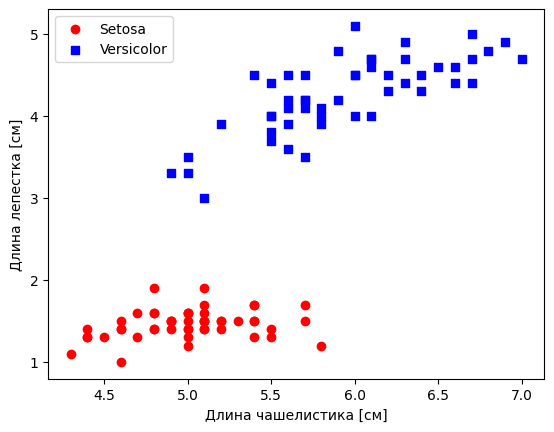

In [28]:
import matplotlib.pyplot as plt

# выбираем setosa и versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# извлекаем длину чашелистика и длину лепестка
X = df.iloc[0:100, [0, 2]].values

# отбражаем данные
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Длина чашелистика [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

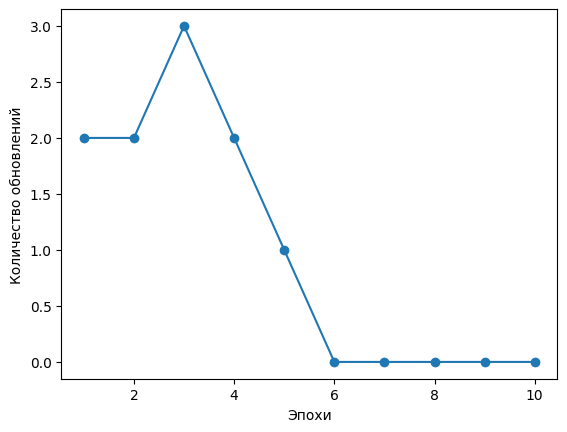

In [29]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("Эпохи")
plt.ylabel('Количество обновлений')
plt.show()

In [30]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Настройка генератора меток и цветовой карты
    markers = ('o','s', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # постоение решающей поверхности
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # постоение образцов класса
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolors='black')

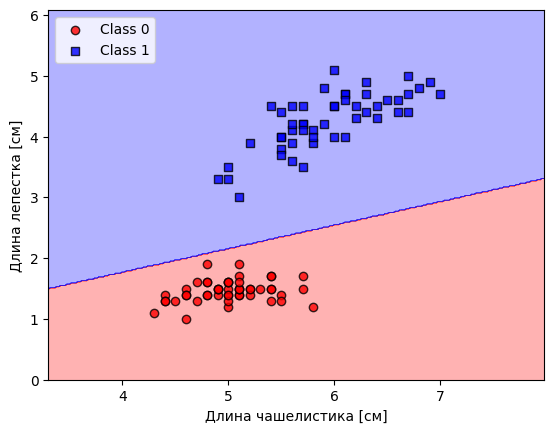

In [31]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Длина чашелистика [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

In [32]:
class AdalineGD:
    """Классификатор на адаптивных линейных нейронах.
    
    Параметры
    ----------
    eta : float
      Скорость обучения (между 0.0 и 1.0)
    n_iter : int
      Кол-во проходов по обучающему набору.
    random_state : int
      Опорное значение генератора случайных чисел для инициализация весов.
    
    Атрибуты
    --------
    w_ : 1d-array
      Веса после подгонки.
    b_ : Scalar
      Смещение после подгонки.
    losses_ : list
      Значение спеднеквадратичной функции потерь после каждой эпохи.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Подгонка к обучающим данным..
        
        Параметры
        ---------
        X : (array-like), shape = [n_expample, n_features]
          Обучающий вектор, где n_examples - это количество образцов,
          а n_features - количество признаков.
        y : array-like, shape = [n_examples]
          Целевые значения.
          
        Возвращение значения
        --------------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        """Вычисление фактического входа"""
        return np.dot(X, self.w_) + self.b_ 
    
    def activation(self, X):
        """Вычисление линейной активации"""
        return X
    
    def predict(self, X):
        """Возвращает метки класса после шага"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

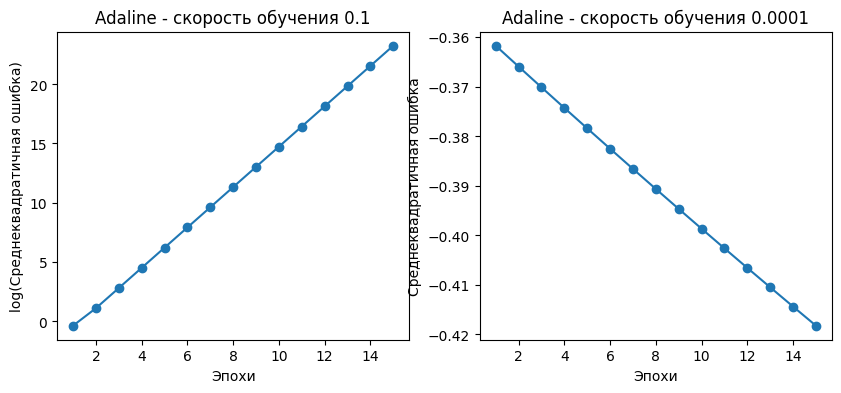

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log(Среднеквадратичная ошибка)')
ax[0].set_title('Adaline - скорость обучения 0.1')
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), np.log10(ada2.losses_), marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('Среднеквадратичная ошибка')
ax[1].set_title('Adaline - скорость обучения 0.0001')
plt.show()

In [34]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

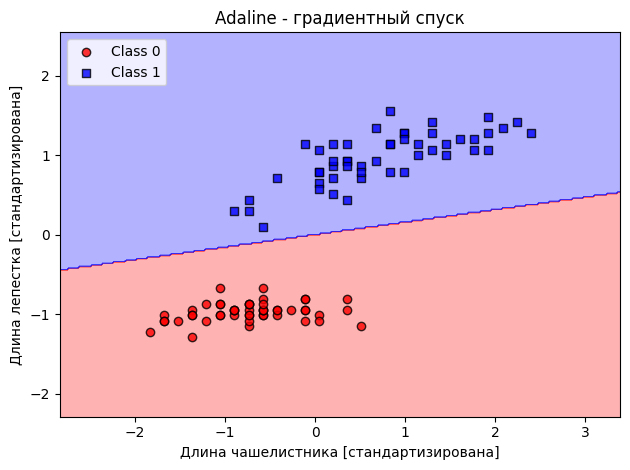

In [35]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - градиентный спуск')
plt.xlabel('Длина чашелистника [стандартизирована]')
plt.ylabel('Длина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


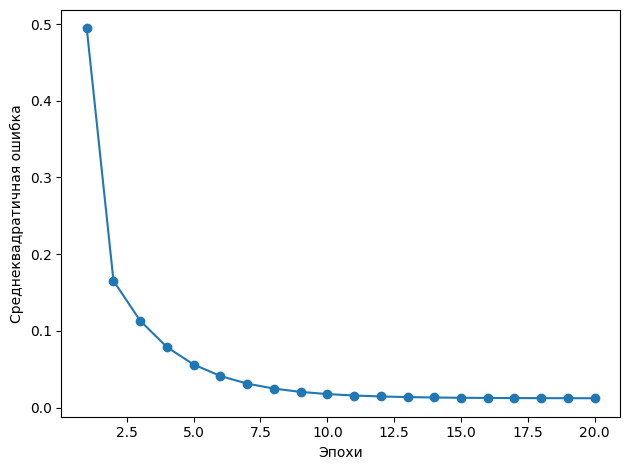

In [36]:
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Среднеквадратичная ошибка')
plt.tight_layout()
plt.show()

In [37]:
class AdalineSGD:
    """Классификатор на адаптивных линейных нейронах.
    
    Параметры
    ----------
    eta : float
      Скорость обучения (между 0.0 и 1.0)
    n_iter : int
      Кол-во проходов по обучающему набору.
    shuffle : bool (default: True)
      Перемешывание обучающих данных каждую эпоху, если задано True,
      для предотвращения возникноения циклов.
    random_state : int
      Опорное значение генератора случайных чисел для инициализация весов.
    
    Атрибуты
    --------
    w_ : 1d-array
      Веса после подгонки.
    b_ : Scalar
      Смещение после подгонки.
    losses_ : list
      Значение спеднеквадратичной функции потерь после каждой эпохи.
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        """Подгонка к обучающим данным..
        
        Параметры
        ---------
        X : (array-like), shape = [n_expample, n_features]
          Обучающий вектор, где n_examples - это количество образцов,
          а n_features - количество признаков.
        y : array-like, shape = [n_examples]
          Целевые значения.
          
        Возвращение значения
        --------------------
        self : object
        """
        
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        
        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X,y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self
    
    def partial_fit(self, X, y):
        """Подгонка к обучающим данным без повторной инициализации весов"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Перемешивание обучающих данных"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Инициализация весов небольшими обучающими данными"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Применение правила Adaline для обновления весов"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Вычисление фактического ввода"""
        return np.dot(X, self.w_) + self.b_ 
    
    def activation(self, X):
        """Вычисление линейной активации"""
        return X
    
    def predict(self, X):
        """Возвращает метки класса после шага"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

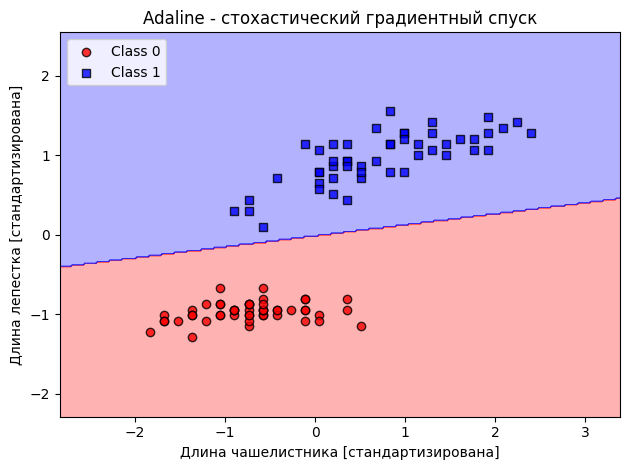

In [38]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - стохастический градиентный спуск')
plt.xlabel('Длина чашелистника [стандартизирована]')
plt.ylabel('Длина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

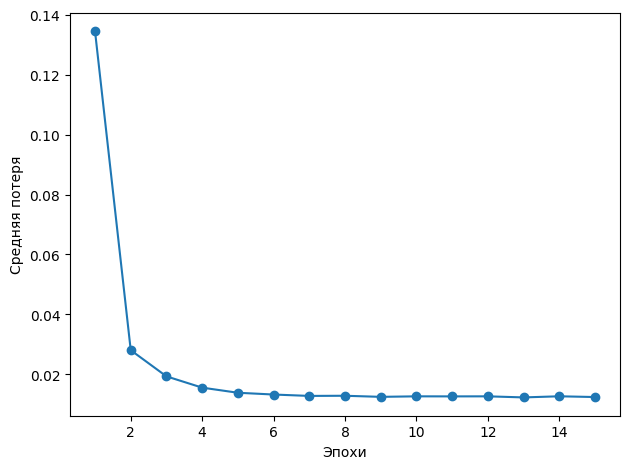

In [39]:
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Средняя потеря')
plt.tight_layout()
plt.show()

# Классификаторы

In [40]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Метки класса: ', np.unique(y))

Метки класса:  [0 1 2]


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)


In [42]:
print('Количество меток в у: ', np.bincount(y))
print('Количество меток в у_train: ', np.bincount(y_train))
print('Количество меток в у_test: ', np.bincount(y_test))

Количество меток в у:  [50 50 50]
Количество меток в у_train:  [35 35 35]
Количество меток в у_test:  [15 15 15]


In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [44]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [45]:
y_pred = ppn.predict(X_test_std)
print('Ошибочно классифицированы: %d' % (y_test != y_pred).sum())

Ошибочно классифицированы: 1


In [46]:
from sklearn.metrics import accuracy_score
print('Точность: %.3f' % accuracy_score(y_test, y_pred))

Точность: 0.978


In [47]:
print('Точность: %.3f' % ppn.score(X_test_std, y_test))

Точность: 0.978


In [48]:
from matplotlib.colors import ListedColormap
# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Настройка генератора меток и цветовой карты
    markers = ('o','s', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # постоение решающей поверхности
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # постоение образцов класса
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolors='black')
    # выделяем тестовые образцы
    if test_idx:
        # отобразить все образцы
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none',
                    edgecolors='black', alpha=1.0, linewidths=1,
                    marker='o', s=100, label='Test set')

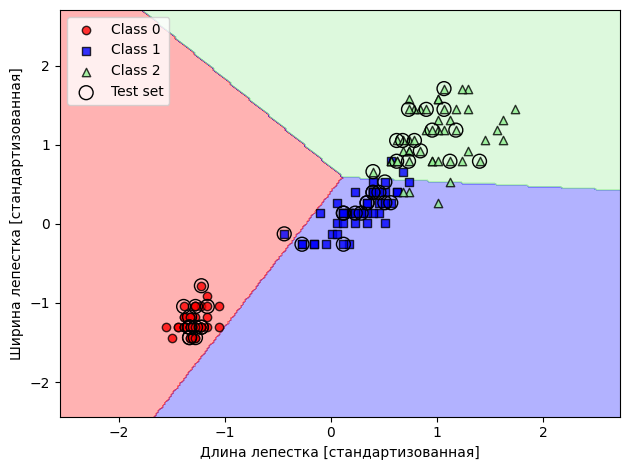

In [49]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизованная]')
plt.ylabel('Ширина лепестка [стандартизованная]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

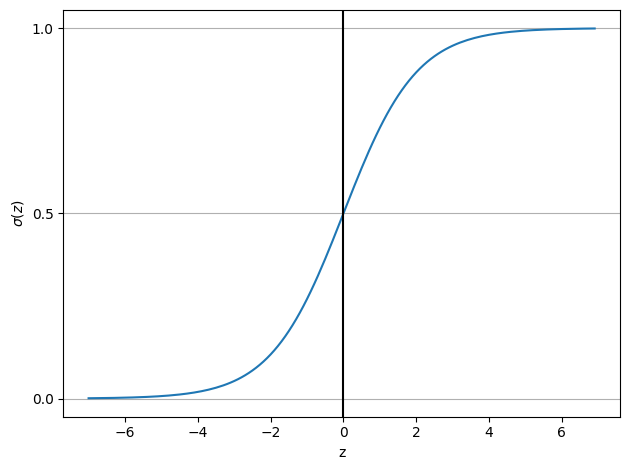

In [50]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# деление оси у на линии сетки
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

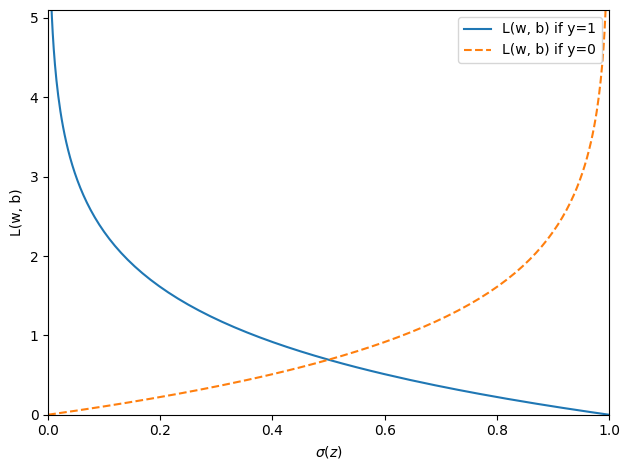

In [51]:
def loss_1(z):
    return -np.log(sigmoid(z))
def loss_0(z):
    return -np.log(1-sigmoid(z))
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [52]:
class LogisticRegressionGD:
    """Классификатор по методу логистической регрессии на основе градиентного спуска.
    
    Параметры
    ----------
    eta : float
      Скорость обучения (между 0.0 и 1.0)
    n_iter : int
      Кол-во проходов по обучающему набору.
    random_state : int
      Опорное значение генератора случайных чисел для инициализация весов.
    
    Атрибуты
    --------
    w_ : 1d-array
      Веса после подгонки.
    b_ : Scalar
      Смещение после подгонки.
    losses_ : list
      Значение спеднеквадратичной функции потерь после каждой эпохи.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Подгонка к обучающим данным..
        
        Параметры
        ---------
        X : (array-like), shape = [n_expample, n_features]
          Обучающий вектор, где n_examples - это количество образцов,
          а n_features - количество признаков.
        y : array-like, shape = [n_examples]
          Целевые значения.
          
        Возвращение значения
        --------------------
        self : Экземпляр LogisticRegressionGD
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0])
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        """Вычисление фактического входа"""
        return np.dot(X, self.w_) + self.b_ 
    
    def activation(self, z):
        """Вычисление линейной активации"""
        return 1. / (1. + np.exp(-np.clip(z, -250,250)))
    
    def predict(self, X):
        """Возвращает метки класса после шага"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

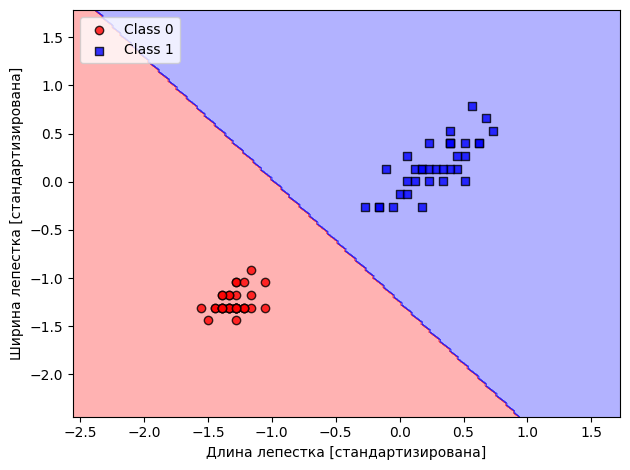

In [53]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

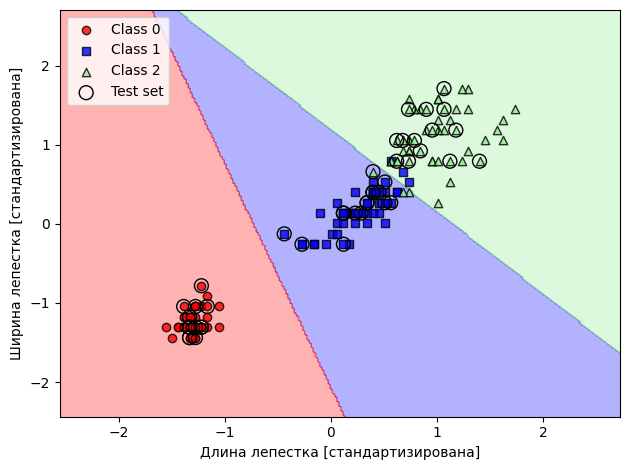

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [62]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [63]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [64]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [68]:
lr.predict((X_test_std[0, :]).reshape(1, -1))

array([2])

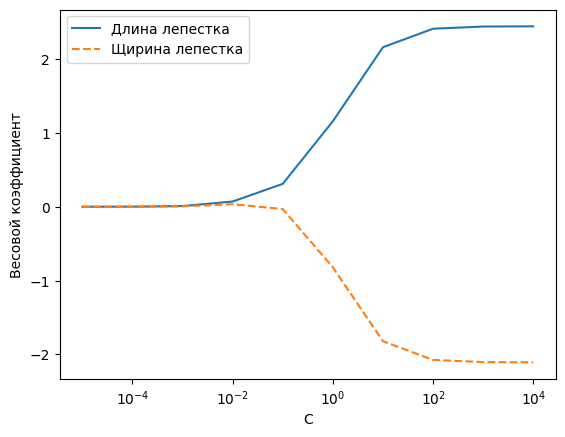

In [69]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='Длина лепестка')
plt.plot(params, weights[:, 1], linestyle='--', label='Щирина лепестка')
plt.ylabel('Весовой коэффициент')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

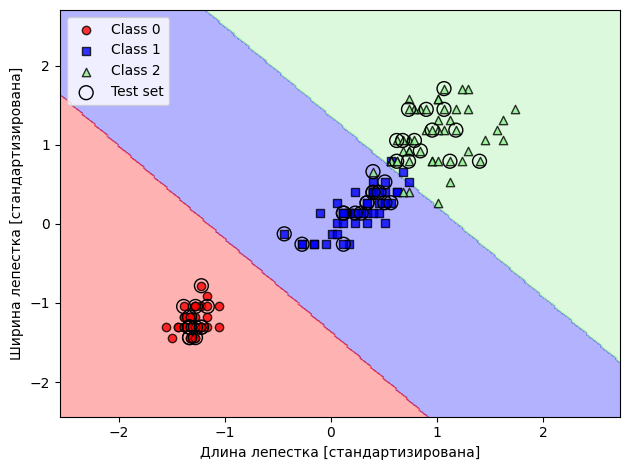

In [70]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

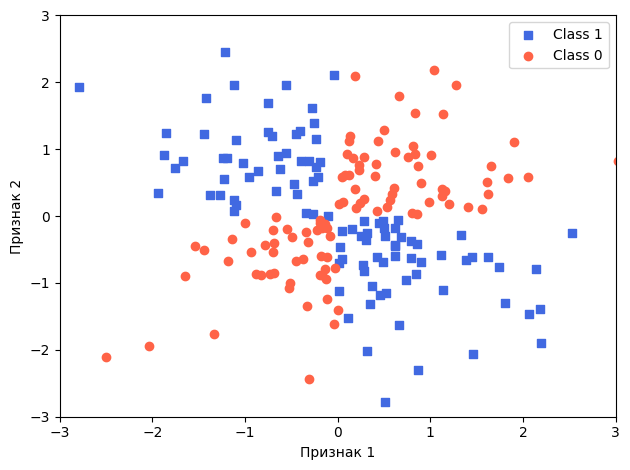

In [72]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='royalblue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='tomato', marker='o', label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

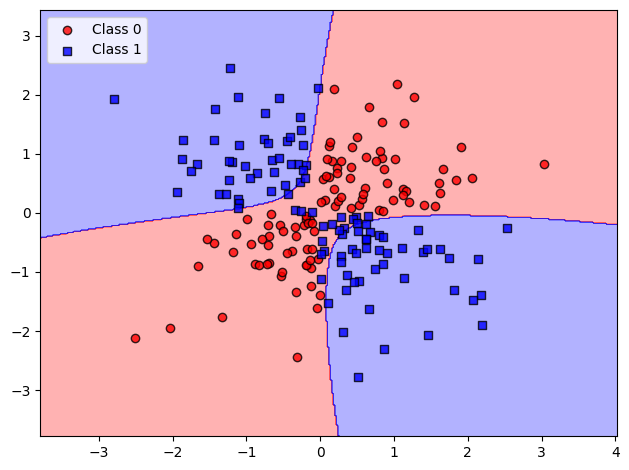

In [73]:
svm = SVC(kernel='rbf', C=10.0, gamma=0.10, random_state=1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X=X_xor, y=y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

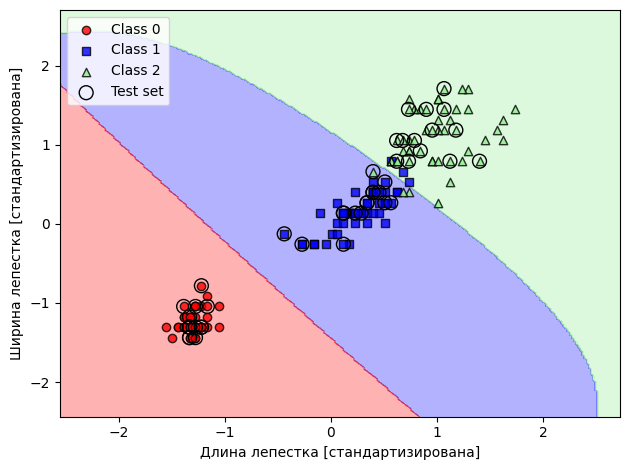

In [74]:
svm = SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

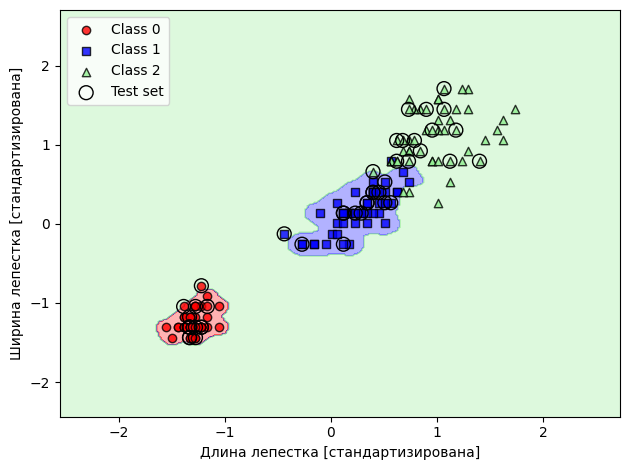

In [75]:
svm = SVC(kernel='rbf', C=1.0, gamma=100, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [78]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

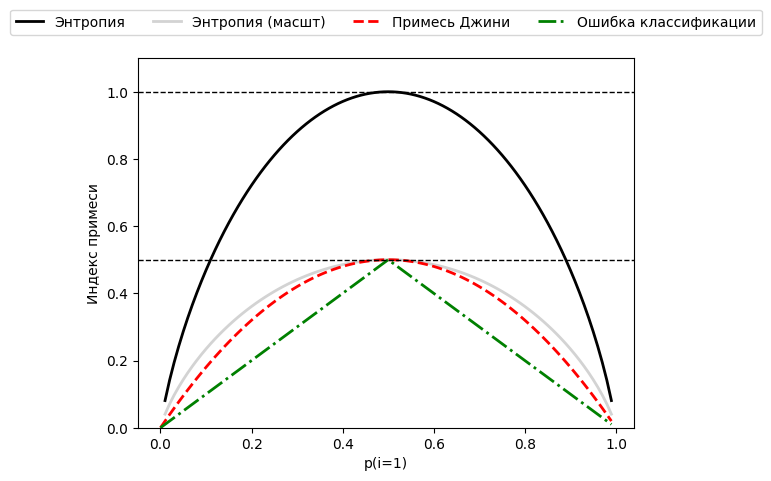

In [81]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Энтропия', 'Энтропия (масшт)','Примесь Джини','Ошибка классификации'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.ylabel('Индекс примеси')
plt.xlabel('p(i=1)')
plt.show()